In [ ]:
#pip install circlify

In [3]:
import pandas as pd
import numpy as np
import urllib.request as urllib2
import circlify
import matplotlib.pyplot as plt # this is just to demonstrate with matplotlib
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import json
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [4]:
import urllib.request as urllib2
f=urllib2.urlopen('https://maiderdorronsoro.github.io/visualizacion.github.io/company.json')
data= json.load(f)
data

[{'id': 'AA',
  'datum': 169,
  'children': [{'id': 'IT & FINANCE',
    'datum': 56,
    'children': [{'id': 'IT',
      'datum': 17,
      'children': [{'id': 'DATA', 'datum': 12}, {'id': 'INFRA', 'datum': 5}]},
     {'id': 'FINANCE',
      'datum': 39,
      'children': [{'id': 'CORPORATE', 'datum': 14},
       {'id': 'CONTABILIDAD', 'datum': 13},
       {'id': 'CASH & CLIENTS', 'datum': 12}]}]},
   {'id': 'SUPPLY',
    'datum': 35,
    'children': [{'id': 'DEMAND',
      'datum': 5,
      'children': [{'id': 'DEM', 'datum': 5}]},
     {'id': 'LOGISTICA', 'datum': 3, 'children': [{'id': 'LOG', 'datum': 3}]},
     {'id': 'PLANNING', 'datum': 3, 'children': [{'id': 'PLA', 'datum': 3}]},
     {'id': 'PRODUCCIÓN',
      'datum': 24,
      'children': [{'id': 'PRP_1', 'datum': 4},
       {'id': 'PRP_2', 'datum': 13},
       {'id': 'PRP_3', 'datum': 7}]}]},
   {'id': 'PROCUREMENT',
    'datum': 17,
    'children': [{'id': 'BUYING',
      'datum': 17,
      'children': [{'id': 'HC', 'datum'

In [5]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

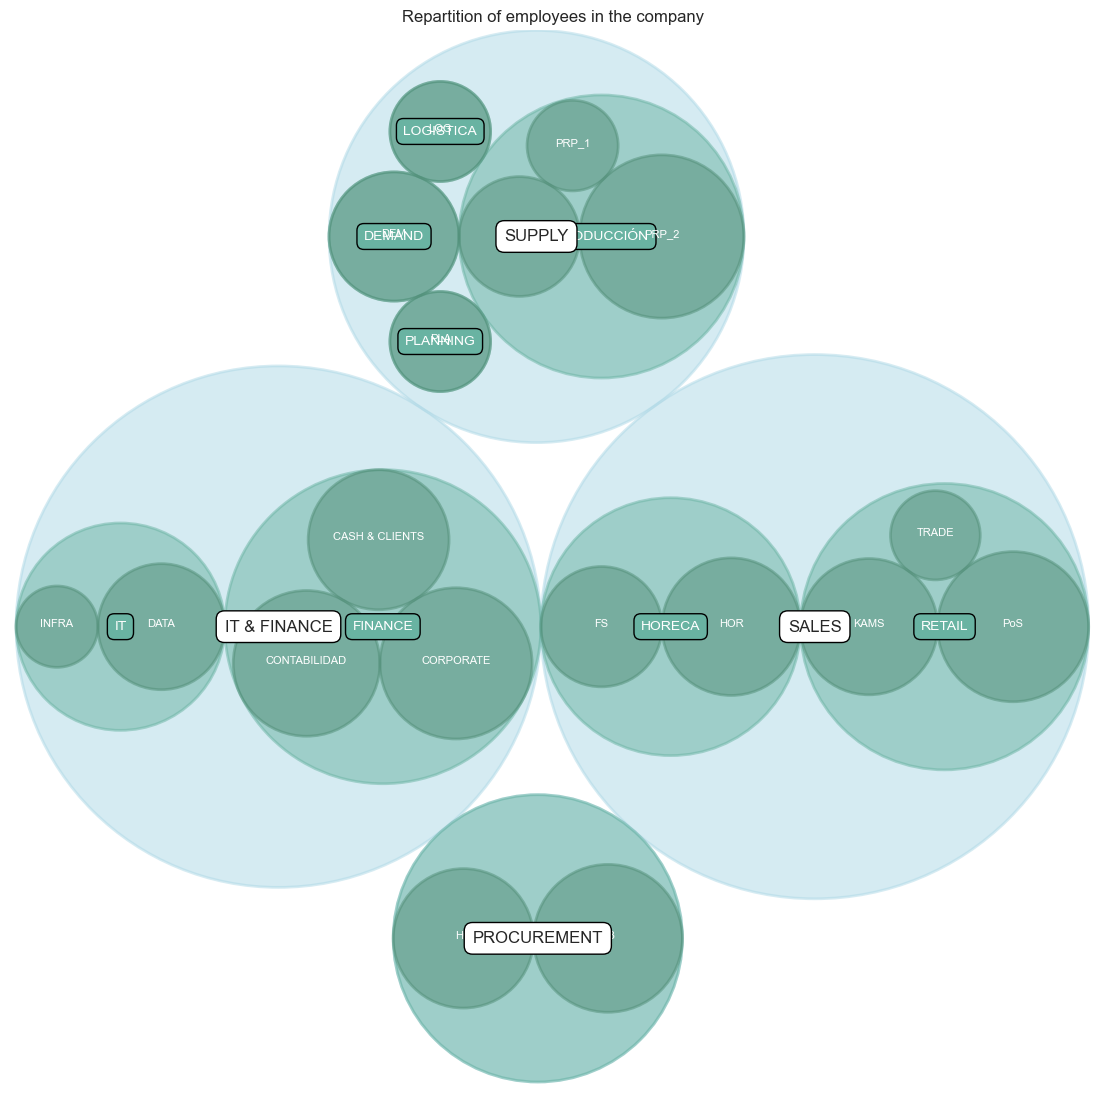

In [6]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of employees in the company')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), va='center',ha='center',size=10, color="white",bbox=dict(facecolor='#69b3a2', edgecolor='black', boxstyle='round',pad=.5))
    
for circle in circles:
    if circle.level != 4:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#518e77"))
    plt.annotate(label, (x,y ), ha='center', color="white", size=8)

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',pad=.5))



In [7]:
df= pd.read_csv('https://maiderdorronsoro.github.io/visualizacion.github.io/sales.csv', sep=';')

In [8]:
df

,MARCA,PRODUCTO,CATEGORIA,SALES
0,AGUINAMAR,MUSSELS,MEJ-COT-AG,18115
1,AGUINAMAR,MUSSELS,MEJ-RES-AG,53487
2,AGUINAMAR,OCTOPUS,PULPO-ELAB,5312
3,AGUINAMAR,OCTOPUS,PULPO-AG,33062
4,AGUINAMAR,SALMON,LONCHAS,6642
5,AGUINAMAR,SALMON,TACOS,8074
6,AGUINAMAR,SALMON,TROZO,50933
7,AGUINAMAR,SHRIMPS,RAW,8052
8,AGUINAMAR,SHRIMPS,COLA-LANG,36747
9,KRISSIA,CRAB STICK,NaN,52549


In [11]:
fig = px.sunburst(
    df, path=['MARCA',
             'PRODUCTO',
             'CATEGORIA'
             ],
        values='SALES',
    
)
#fig.update_layout(margin = dict(t = 0, l = 0, r = 1, b = 0))
fig.show()

In [ ]:
dff= pd.read_csv('https://maiderdorronsoro.github.io/visualizacion.github.io/Madrid%20Daily%20Weather%201997-2015.csv')

In [ ]:
dff['date']=pd.to_datetime(dff['CET'])

In [ ]:
dff['month']=dff['date'].dt.month

In [ ]:
dff['year']=dff['date'].dt.year

In [ ]:
dff.head()

In [ ]:
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
dff['mes'] = dff['month'].map(month_dict)

In [ ]:
# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = dff.groupby('month')['Mean TemperatureC'].mean()
dff['mean_month'] = dff['month'].map(month_mean_serie)

In [ ]:
dff.head()

In [ ]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(dff, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Madrid per month [1997-2015]',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()